In [14]:
#meng-import library pandas, library ini dapat kita gunakan untuk membaca data dalam format xlsx ataupun csv
import pandas as pd
pd.set_option('display.max_column', 20)

In [15]:
#men-load file data.csv sebagai pandas data frame untuk mempermudah proses pengolahan data
df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')

#perintah untuk menampilkan 5 data pertama
print(df.head())

  kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295        YA                     48   
1   AGR-000011                      271        YA                     36   
2   AGR-000030                      159     TIDAK                     12   
3   AGR-000043                      210        YA                     12   
4   AGR-000049                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


In [16]:
#menghilangkan kolom 'kode_kontrak' dari data frame dikarenakan kolom ini tidak relevan untuk dijadikan input dalam tugas klasifikasi (kode_kontrak tidak mempengaruhi apakah customer akan lanjut berlangganan atau tidak)
df.drop('kode_kontrak', axis=1, inplace=True)

#memeriksa 5 data teratas
print(df.head())

   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


In [17]:
#memeriksa rasio kemunculan label
print('Rasio kemunculan  label:')
print(pd.concat([df['risk_rating'].value_counts(), 100*df['risk_rating'].value_counts(normalize=True).rename('percentage_risk_rating')], axis=1))

Rasio kemunculan  label:
   risk_rating  percentage_risk_rating
3          291               32.333333
1          227               25.222222
2          159               17.666667
4          120               13.333333
5          103               11.444444


In [18]:
#menyimpan kolom 'rating' sebagai list ke dalam variabel y
y = df.pop('risk_rating').to_list()
 
#untuk setiap label jika nilai label = 5 maka kembalikan nilai 4
y = [4 if label == 5 else label for label in y]
 
#mengubah tipe data dari array y menjadi numpy array hal ini dikarenakan beberapa fungsi library scikit-learn hanya kompatibel terhadap numpy array
import numpy as np
y = np.array(y)

print('\nDataset:')
print(df.head())


Dataset:
   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  
0                  5      61 - 90 days  
1                  5      61 - 90 days  
2                  0       0 - 30 days  
3                  3      46 - 60 days  
4                  0      31 - 45 days  


In [19]:
#menyiapkan fungsi untuk mengubah nilai kpr_aktif
def convert_kpr_aktif(kpr_aktif):
	if kpr_aktif == 'YA':
		return 1
	return 0
 
#mengubah setiap nilai pada kolom kpr aktif menggunakan fungsi 'convert_kpr_aktif'
df['kpr_aktif']= df['kpr_aktif'].apply(convert_kpr_aktif)
print(df.head())

   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan rata_rata_overdue  
0                  5      61 - 90 days  
1                  5      61 - 90 days  
2                  0       0 - 30 days  
3                  3      46 - 60 days  
4                  0      31 - 45 days  


In [20]:
#rasio kemunculan setiap kategori rata_rata_overdue
print('Rasio kemunculan  setiap kategori rata_rata_overdue:')
print(pd.concat([df['rata_rata_overdue'].value_counts(), 100*df['rata_rata_overdue'].value_counts(normalize=True).rename('percentage_rata_rata_overdue')], axis=1))

Rasio kemunculan  setiap kategori rata_rata_overdue:
              rata_rata_overdue  percentage_rata_rata_overdue
46 - 60 days                291                     32.333333
0 - 30 days                 227                     25.222222
31 - 45 days                159                     17.666667
61 - 90 days                120                     13.333333
> 90 days                   103                     11.444444


In [21]:
#fungsi untuk mengubah nilai dari kolom 'rata_rata_overdue'
def change_overdue(overdue):
	if overdue == '0 - 30 days':
		return 0
	elif overdue == '31 - 45 days':
		return 1
	elif overdue == '46 - 60 days':
		return 2
	elif overdue == '61 - 90 days':
		return 3
	else:
		return 4
	
#mengaplikasikan fungsi pada kolom 'rata_rata_overdue'
df['rata_rata_overdue'] = df['rata_rata_overdue'].apply(change_overdue)

print("\nLima baris dataset teratas:")
print(df.head())


Lima baris dataset teratas:
   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan  rata_rata_overdue  
0                  5                  3  
1                  5                  3  
2                  0                  0  
3                  3                  2  
4                  0                  1  


In [22]:
#merepresentasikan seluruh kolom dalam df sebagai matrik dan menampungnya dalam variabel X.
X = df.to_numpy()

#menampilkan informasi dimensi dari variabel X
print('Dimensi dari variabel X:', X.shape)

Dimensi dari variabel X: (900, 5)


In [23]:
#library yang akan kita gunakan untuk membagi dataset menggunakan strategi validasi KFold
from sklearn.model_selection import KFold
 
#menginisialisasi object KFold dengan jumlah kelompok data = 5 nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 5, shuffle=True, random_state = 57)
 
#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for i, (train_index, test_index) in enumerate(kf.split(X)):
	X_train, y_train = X[train_index], y[train_index]
	X_test, y_test = X[test_index], y[test_index]

	print("Percobaan ke-", i+1)
	print("10 indeks data latih pertama:", train_index[:10])
	print("10 indeks data testing pertama:", test_index[:10])
	print("============================================================")

Percobaan ke- 1
10 indeks data latih pertama: [ 0  1  2  3  4  5  6  7  8 13]
10 indeks data testing pertama: [ 9 10 11 12 15 25 29 32 44 52]
Percobaan ke- 2
10 indeks data latih pertama: [ 0  2  4  5  6  8  9 10 11 12]
10 indeks data testing pertama: [ 1  3  7 14 20 28 37 43 49 59]
Percobaan ke- 3
10 indeks data latih pertama: [ 0  1  2  3  4  5  6  7  9 10]
10 indeks data testing pertama: [ 8 13 22 23 27 30 31 33 38 39]
Percobaan ke- 4
10 indeks data latih pertama: [ 1  3  4  5  6  7  8  9 10 11]
10 indeks data testing pertama: [ 0  2 16 17 19 21 24 35 36 42]
Percobaan ke- 5
10 indeks data latih pertama: [ 0  1  2  3  7  8  9 10 11 12]
10 indeks data testing pertama: [ 4  5  6 18 26 34 40 47 50 54]


In [25]:
#library yang digunakan untuk menghitung akurasi
from sklearn.metrics import accuracy_score

#library yang digunakan untuk menggunakan model k-NN
from sklearn.neighbors import KNeighborsClassifier
 
#library yang akan kita gunakan untuk membagi dataset menggunakan strategi validasi KFold
from sklearn.model_selection import KFold
 
#menginisialisasi object KFold dengan jumlah kelompok data = 5. nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 5, shuffle=True, random_state = 57)
 
scores_test = []
scores_train = []
 
#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for train_index, test_index in kf.split(X):
	X_train, y_train = X[train_index], y[train_index]
	X_test, y_test = X[test_index], y[test_index]
	
	model = KNeighborsClassifier()
	
	#menspesifikasikan data latih beserta labelnya untuk dipelajari oleh model
	model.fit(X_train, y_train)
	
	#meminta model yang telah dilatih untuk memprediksi data X_train
	#menampung hasil prediksi ke dalam variabel y_pred
	y_pred = model.predict(X_train)
	
	#menampung akurasi dari model ke variabel current_score
	current_score = accuracy_score(y_train, y_pred)
	
	#menambahkan skor saat ini ke list scores
	scores_train.append(current_score)
	
	#meminta model yang telah dilatih untuk memprediksi data X_test
	#menampung hasil prediksi ke dalam variabel y_pred
	y_pred = model.predict(X_test)
	
	#menampung akurasi dari model ke variabel current_score
	current_score = accuracy_score(y_test, y_pred)
	
	#menambahkan skor saat ini ke list scores
	scores_test.append(current_score)
	
print("Skor latih tertinggi: ", round(max(scores_train),2))
print("Skor latih terendah: ", round(min(scores_train),2))
print("Skor latih rata-rata: ", round(sum(scores_train)/ len(scores_train),2))

print("Skor testing tertinggi: ", round(max(scores_test),2))
print("Skor testing terendah: ", round(min(scores_test),2))
print("Skor testing rata-rata: ", round(sum(scores_test)/ len(scores_test),2))

Skor latih tertinggi:  0.75
Skor latih terendah:  0.73
Skor latih rata-rata:  0.74
Skor testing tertinggi:  0.62
Skor testing terendah:  0.56
Skor testing rata-rata:  0.58


In [26]:
#Paramterisasi

#library yang digunakan untuk mencari parameterisasi 
#model dengan strategi validasi KFold
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
#parameter-parameter yang akan diujicobakan pada model
parameter_space = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'metric': ['euclidean', 'manhattan']
}
 
#menginisialisasi object GridSearchCV pada classifier
#penjelasan terkait dengan parameter-parameter lain yang diterima pada object akan diberikan setelah potongan kode
 
kfold = KFold(n_splits=5, shuffle=True,random_state=57)
searcher = GridSearchCV(clf, parameter_space, scoring='accuracy', cv = kfold)
 
#meminta object untuk memproses data X dan y.
searcher.fit(X,y)
 
print("Parameter terbaik: ", searcher.best_params_)
print("Akurasi terbaik: ", searcher.best_score_)

Parameter terbaik:  {'metric': 'manhattan', 'n_neighbors': 5}
Akurasi terbaik:  0.7322222222222223


Output di atas menunjukkan bahwa berdasarkan proses pencarian yang telah dilakukan parameter terbaik diperoleh dari penggunaan fungsi jarak “manhattan” dengan nilai n_neighbors sebesar lima (5), model dengan parameter ini menghasilkan nilai akurasi sebesar 73.3%.

1. Berdasarkan parameter “parameter_space” object GridSearchCV akan mencoba melatih sejumlah model dengan kombinasi parameter berbeda dalam parameter. Berdasarkan potongan kode di atas, akan diujicobakan sebanyak 10 model k-NN dengan parameter yang berbeda, yaitu.
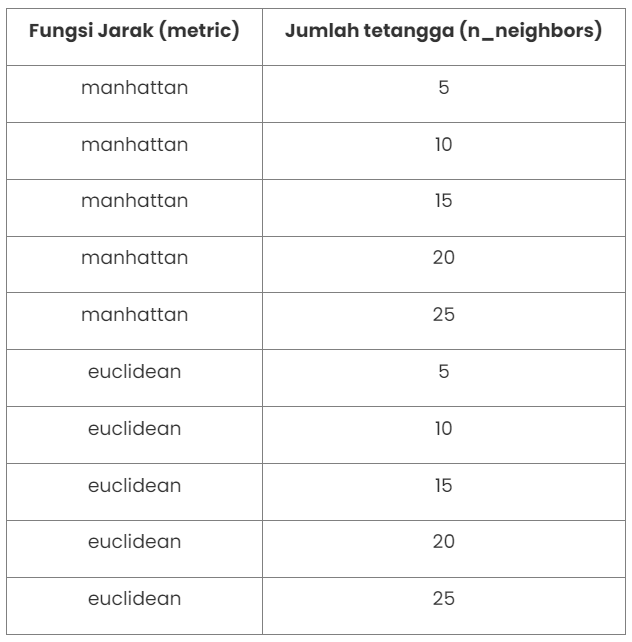


2. Untuk setiap model, object GridSearchCV akan melakukan proses pelatihan dan evaluasi dengan menggunakan strategi validasi sesuai dengan parameter “cv” yang diberikan. Dalam potongan kode di atas, aku menspesifikasikan strategi validasi silang dengan nilai k sama dengan lima (5).

 
3. Terakhir, fungsi pengukuran performa yang digunakan oleh object GridSearchCV akan disesuaikan dengan nilai yang dispesifikasikan pada parameter “scoring” yang diberikan. Dalam potongan kode di atas, aku menspesifikasikan metrik akurasi.

 
Setelah fungsi fit(X,y) selesai, object GridSearchCV (dalam variabel searcher) akan menyimpan performa (skor) rata-rata testing untuk model terbaik dalam atribut “best_score_” dan menyimpan konfigurasi parameter terbaik dalam atribut “best_params” miliknya.

In [27]:
#library yang kita gunakan untuk menggabungkan beberapa object yang dibutuhkan dalam proses pengembangan model machine learning sebagai satu kesatuan.
#saat sebuah fungsi fit, predict, ataupun fungsi lainnya dipanggil pada object pipeline maka fungsi akan dijalankan pada setiap object di dalamnya secara berurutan
from sklearn.pipeline import Pipeline
 
#library yang kita gunakan untuk mengubah skalasi nilai dari setiap atribut ke dalam suatu rentang tertentu
from sklearn.preprocessing import MinMaxScaler
 
clf = Pipeline([
#menginisialisasi object MinMaxScaler untuk mengubah setiap kolom agar nilai maksimumnya sama dengan 1 dan nilai minimumnya sama dengan 0
  ('scaler', MinMaxScaler(feature_range=(0,1))),
  ('clf', KNeighborsClassifier()),              
])
 
parameter_space = {
    'clf__n_neighbors': [2,3,4,5,6,7,8,9,11],
    'clf__metric': ['euclidean','manhattan']
}
 
kfold = KFold(n_splits=5, shuffle=True,random_state=57)
searcher = GridSearchCV(clf, parameter_space, scoring='accuracy', cv = kfold)
 
searcher.fit(X,y)
 
print("Parameter terbaik: ", searcher.best_params_)
print("Akurasi terbaik: ", searcher.best_score_)

Parameter terbaik:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 6}
Akurasi terbaik:  0.9844444444444445


Berdasarkan potongan kode di atas, dapat terlihat bahwa dengan melakukan proses scaling performa dari model klasifikasi dapat meningkat dengan sangat pesat (dari 77.66% menjadi 98.44%!).

Hal ini dikarenakan metode k-NN bekerja dengan melibatkan fungsi jarak sehingga agar setiap atribut memiliki bobot yang sama, alangkah lebih baiknya jika menyamakan satuan/ skala dari setiap atribut. 

In [28]:
#merepresentasikan ketiga data sebagai variabel X_new
X_new = [
    [320,1,36,1,2],
    [220,0,12,0,1],
    [300,0,12,2,0]
]
 
#perhatikan bahwa kita tidak harus melakukan skalasi terhadap X_new dan proses predict akan melakukannya untuk kita karena kita sudah menspesifikasikan object MinMaxScaler dalam object pipeline pada potongan kode sebelumnya
print(searcher.best_estimator_.predict(X_new))

[3 2 1]


Hasil prediksinya, jika kita memberikan pinjaman pada nasabah pertama akan sangat beresiko karena memiliki risk rating atau nilai resiko 3. Sementara itu, nasabah dengan kriteria kedua cukup beresiko (risk rating bernilai 2) dan pada nasabah ketiga tidak beresiko (risk rating bernilai 1)